# Lab-02  Crossvalidation,  gridSearch, pipelines with KKN Classification and Regression

## Goals of this lab
* Sections 1,2 Review K Nearest Neighbors 
* Section 3: Review  K-fold cross-validation
   * parameter tuning using cross_val_score
* Section 4: Introduce GridSearchCV(a more efficient form parameter tuning)
   * Searching multiple parameters simultaneously
* Section 5: Introduce pipelines as means of setting up workflows that can be repeated easily
   * these pipelines can be used in GridSearches in the case of classification or regression
   * you avoid leakage
* Remaining sections Present a casestudy of hyperparameter tuning for classification 
   * Pipelines
   * Gridsearch
   * Cross validation
   * Held out test dataset
* Utility maximization via Gridsearch (maximize utility == minimize MSE)
* Task: complete a casestudy of hyperparameter tuning for regression


##  References
This lab is derived from Data School's Machine Learning with scikit-learn tutorial. 

* From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)
* [Ritchie Ng's Blog](http://www.ritchieng.com/machine-learning-efficiently-search-tuning-param) 


## An end-to-end Machine Learning pipeline

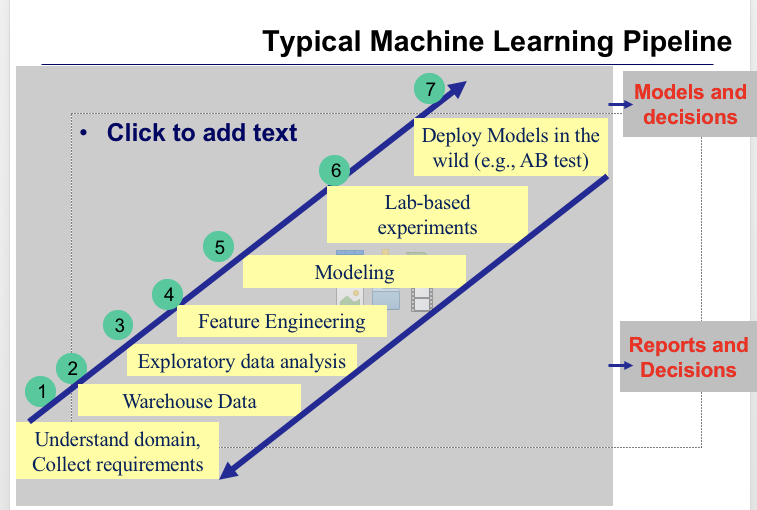

# Cross Validation

Cross-validation, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set (sometimes known as the more general setting or population). It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called out-of-sample or testing set). The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model's predictive performance.

In short, we use the average accuracy on each fold as an estimate of out-of-sample accuracy.

For more background on cross validation see the following references:
* https://en.wikipedia.org/wiki/Cross-validation_(statistics)
* From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

Diagram of **5-fold cross-validation:**

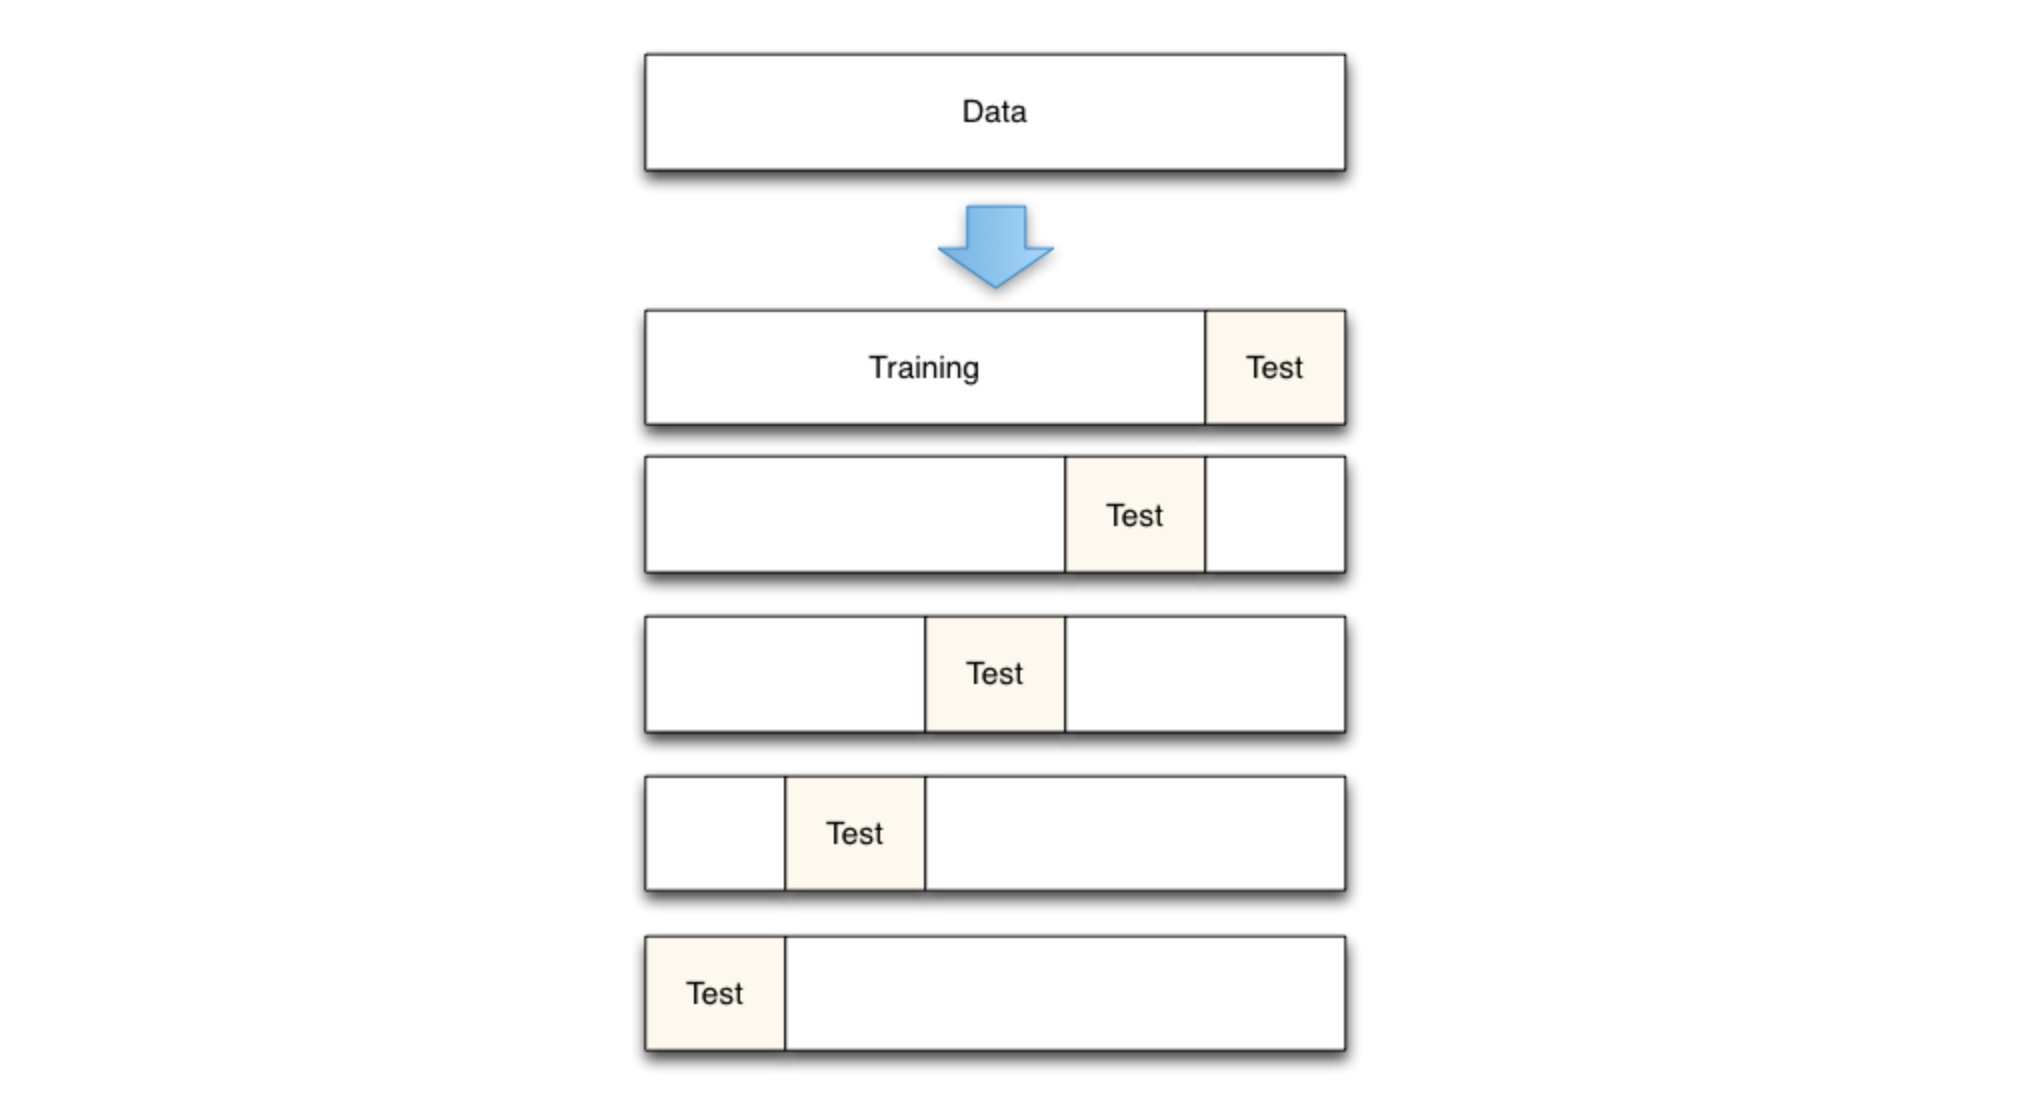


In [1]:
# simulate splitting a dataset of 25 observations into 5 folds
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)
splits = kf.split(list(range(25)))
# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(splits, start=1):
    print('{:^9} {} {:^25}'.format(iteration, format(str(np.array(data[0]))), format(str(np.array(data[1])))))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

## Comparing cross-validation to train/test split

Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

## Cross-validation recommendations

1. n (in n-fold cross validation) can be any number, but **n=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

# A limited example  of  cross-validation in use

This subsection shows `cross_val_score()` in action in a very limited way. The next section gives a full casestudy of how `cross_val_score()` could be use in practice.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=4)

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(f"The accuracy score for each fold is \n{scores}")

# use average accuracy as an estimate of out-of-sample accuracy
print(f"average accuracy over each fold as an estimate of out-of-sample accuracy is: {scores.mean()}")

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"The out of sample accuracy (held-out test sample) is: {metrics.accuracy_score(y_test, y_pred)}")


The accuracy score for each fold is 
[1.         0.91666667 1.         1.         1.         0.91666667
 1.         1.         1.         1.        ]
average accuracy over each fold as an estimate of out-of-sample accuracy is: 0.9833333333333332
The out of sample accuracy (held-out test sample) is: 0.9333333333333333


# Case Study: iris: KNN Review, crossfold validation 

Here we review KNN and also incorporate crossfold validation into the modeling pipeline to optimize hyperparamters (such as number of neighbors in the case of KNN).

## Section overview

- Exploring the KNN Algorithm
- What is the drawback of using the **train/test split** procedure for model evaluation?
- How does **K-fold cross-validation** overcome this limitation?
- How can cross-validation be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**?
- What are some possible **improvements** to cross-validation?


## Review KNN with n=3 versus KNN with n=5 for iris dataset

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.5, random_state=4)

# select sepal features only (for easier 2D visualization)
sepal_train = X_train[:,:2]
sepal_test = X_test[:,:2]

# generate predictions (based on 3 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(sepal_train, y_train)
preds3 = knn.predict(sepal_test)

# generate predictions (based on 5 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(sepal_train, y_train)
preds5 = knn.predict(sepal_test)

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Select the test examples that were predicted differently by each model

There are just **9 test cases** where the prediction the KNN with three neighbors disagrees with KNN with five neighbors. By examining these differences in prediction we get see some of the internals of KNN in action.

In [5]:
# select a few examples that were predicted differently by each model
class_change = np.where((preds3-preds5)!=0)
example_width = sepal_test[class_change][:,1]  
example_length = sepal_test[class_change][:,0]
test_cases = sepal_test[class_change][:,(0,1)] # 9 test cases
print(f"The are {len(class_change[0])} cases where the two KNN classifiers disagreed")
print(f"These predictions for each of these test cases were different   {class_change[0]}")
print(f"The inputs of the cases that were classified differently are:\n\n{test_cases}")

The are 9 cases where the two KNN classifiers disagreed
These predictions for each of these test cases were different   [11 18 19 20 28 30 39 42 49]
The inputs of the cases that were classified differently are:

[[6.9 3.1]
 [6.6 2.9]
 [6.5 3. ]
 [6.5 3. ]
 [6.2 2.2]
 [6.9 3.2]
 [6.  3.4]
 [6.  3. ]
 [6.2 3.4]]


### Plot the training data and a subset of the testdata (where predictions differed)
Plot all the training data and the subset of the testdata where predictions of the two KNN models differed (just 9 test cases). 


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# assign a color to each class
class_colors = {0:'purple', 1:'blue', 2:'green'}

# map colors to true class data 
true_colors = [class_colors[x] for x in y_train]
examples_true_color = [class_colors[x] for x in y_test[class_change]]
                  
# map colors to predicted classes (for knn=3 and knn=5)
preds3_examples = preds3[class_change]
preds3_example_colors = [class_colors[x] for x in preds3_examples]

preds5_examples = preds5[class_change]
preds5_example_colors = [class_colors[x] for x in preds5_examples]

# generate legend patches
setosa = mpatches.Patch(color='purple', label='Setosa')
versicolour = mpatches.Patch(color='green', label='Versicolour')
virginica = mpatches.Patch(color='blue', label='Virginica')

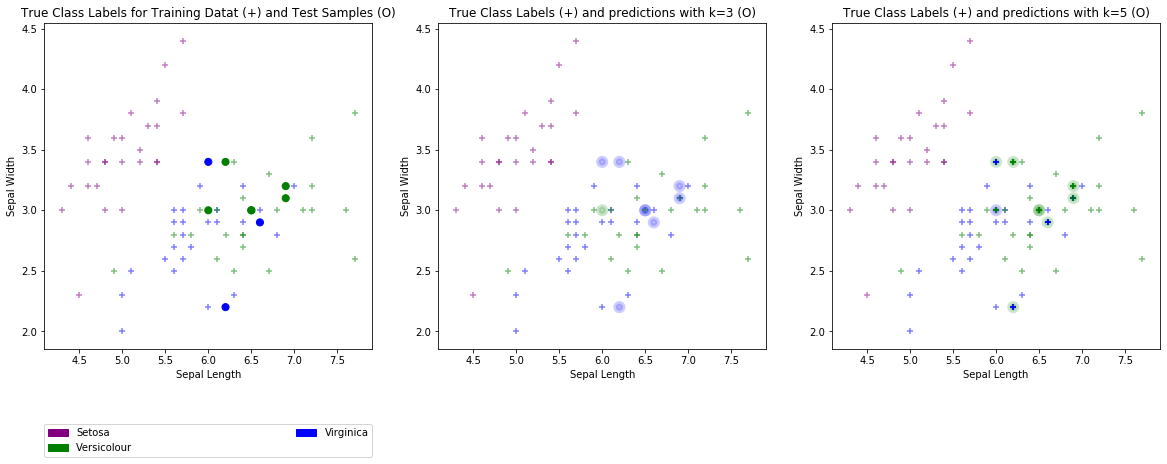

In [7]:
###### plot true class for all data
### Build 3 plots on a single row
fig, ax = plt.subplots(1,3,figsize=(20,6), sharex=True, sharey=True)

# first subplot (all training data) + 9 test cases where there was classifier disagreement
ax[0].scatter(sepal_train[:,0], sepal_train[:,1], c=true_colors, marker='+', alpha=.5)
ax[0].scatter(test_cases[:,0], test_cases[:,1], marker="o", s=50, c=examples_true_color)
ax[0].set_title('True Class Labels for Training Datat (+) and Test Samples (O)')
ax[0].set_xlabel('Sepal Length')
ax[0].set_ylabel('Sepal Width')
ax[0].legend(handles=[setosa, versicolour, virginica], bbox_to_anchor=(0, -.33, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)


# plot examples where test predictions differ
ax[1].scatter(test_cases[:,0], test_cases[:,1],  c=preds3_example_colors, marker="o", s=50, alpha =.2, linewidths = 5)
ax[2].scatter(test_cases[:,0], test_cases[:,1], c=examples_true_color, marker="+")
ax[1].scatter(sepal_train[:,0], sepal_train[:,1], c=true_colors, marker='+', alpha=.5)
ax[1].set_title('True Class Labels (+) and predictions with k=3 (O)')
ax[1].set_xlabel('Sepal Length')
ax[1].set_ylabel('Sepal Width')
ax[1].tick_params(labelleft=True)



ax[2].scatter(test_cases[:,0], test_cases[:,1],  c=preds5_example_colors, marker="o", s=50, alpha =.2, linewidths = 5)
ax[2].scatter(test_cases[:,0], test_cases[:,1], c=examples_true_color, marker="+")
ax[2].scatter(sepal_train[:,0], sepal_train[:,1], c=true_colors, marker='+', alpha=.5)
ax[2].set_title('True Class Labels (+) and predictions with k=5 (O)')
ax[2].set_xlabel('Sepal Length')
ax[2].set_ylabel('Sepal Width')
ax[2].tick_params(labelleft=True);

Notice how the test cases (dots in the middle and right plots are flipped by the two KNN classifiers.


### Examine the Iris data for two KNN classifers (k=3 and k=5)

In [8]:
# calculate euclidean distance
def metric_func(x1, x2):
    distance = np.linalg.norm(x1 - x2, ord=2, axis=1)
    return distance

examples = sepal_test[class_change]
nearest_indices = np.zeros(shape=(examples.shape[0], 5), dtype=np.int) - 1
nearest_distances = np.zeros(shape=(examples.shape[0], 5), dtype=np.float) - 1

# collect index and distance for 5 nearest neighbors
for i in range(examples.shape[0]):
    distances = metric_func(examples[i], sepal_train)
    index_order = np.argsort(distances)[:5]
    nearest_indices[i] = index_order
    nearest_distances[i] = distances[index_order]
    

In [9]:
import pandas as pd
pd.set_option('display.max_colwidth',100)
df = pd.DataFrame(columns=["Test Sample", "Nearest Points", "Euclidean Distance", 
                           "Class(es)", "Pred k=3", "Pred k=5" ])

for i in range(len(examples)):
    df.loc[i] = [examples[i], sepal_train[nearest_indices[i]], np.round(nearest_distances[i],3), 
                 y_train[nearest_indices[i]], 
                 np.argmax(np.bincount(y_train[nearest_indices[i, :3]])), #k = 3
                 np.argmax(np.bincount(y_train[nearest_indices[i, :5]]))  #k =5  
                ]

### Examine data for test Samples
|Column Name   | Description|
|:--|:---|
|Test Data| Sample points (sepal width, sepal length) taken from the held-out test data |
|Nearest Points| Five nearest points (by Euclidean distance) from the data used to train the model |
|Euclidean Distance| Distance from the test sample to each of the five nearest points|
|Class(es)| True class(es) of the five nearest points|
|Pred k=3 | Predicted class for the test sample when k=3 |
|Pred k=5|  Predicted class for the test sample when k=5 |


In [10]:
df

,Test Sample,Nearest Points,Euclidean Distance,Class(es),Pred k=3,Pred k=5
0,"[6.9, 3.1]","[[6.9, 3.1], [6.9, 3.1], [7.0, 3.2], [6.8, 3.0], [7.1, 3.0]]","[0.0, 0.0, 0.141, 0.141, 0.224]","[1, 2, 1, 2, 2]",1,2
1,"[6.6, 2.9]","[[6.6, 3.0], [6.5, 3.0], [6.4, 2.9], [6.4, 2.8], [6.4, 2.8]]","[0.1, 0.141, 0.2, 0.224, 0.224]","[1, 2, 1, 2, 2]",1,2
2,"[6.5, 3.0]","[[6.5, 3.0], [6.6, 3.0], [6.4, 3.1], [6.4, 2.9], [6.4, 3.2]]","[0.0, 0.1, 0.141, 0.141, 0.224]","[2, 1, 2, 1, 1]",2,1
3,"[6.5, 3.0]","[[6.5, 3.0], [6.6, 3.0], [6.4, 3.1], [6.4, 2.9], [6.4, 3.2]]","[0.0, 0.1, 0.141, 0.141, 0.224]","[2, 1, 2, 1, 1]",2,1
4,"[6.2, 2.2]","[[6.3, 2.3], [6.0, 2.2], [6.3, 2.5], [6.1, 2.6], [6.4, 2.7]]","[0.141, 0.2, 0.316, 0.412, 0.539]","[1, 1, 2, 2, 2]",1,2
5,"[6.9, 3.2]","[[7.0, 3.2], [6.9, 3.1], [6.9, 3.1], [6.7, 3.3], [6.8, 3.0]]","[0.1, 0.1, 0.1, 0.224, 0.224]","[1, 1, 2, 2, 2]",1,2
6,"[6.0, 3.4]","[[5.9, 3.2], [6.3, 3.4], [6.1, 3.0], [6.1, 3.0], [5.9, 3.0]]","[0.224, 0.3, 0.412, 0.412, 0.412]","[1, 2, 2, 1, 2]",2,2
7,"[6.0, 3.0]","[[6.1, 3.0], [6.1, 3.0], [5.9, 3.0], [6.0, 2.9], [6.1, 2.9]]","[0.1, 0.1, 0.1, 0.1, 0.141]","[1, 2, 2, 1, 1]",2,1
8,"[6.2, 3.4]","[[6.3, 3.4], [6.4, 3.2], [5.9, 3.2], [6.4, 3.1], [6.1, 3.0]]","[0.1, 0.283, 0.361, 0.361, 0.412]","[2, 1, 1, 2, 1]",1,1


## Which model? HiPPO versus CrossValidation: 

**Motivation:** We need an objective way to choose between different machine learning models 

- Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial idea:** HiPP0 (highest paid person's opinion
* bad idea!

**Another idea:** Train and test on the same data

- But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data
- This is a BAD idead

**Alternative idea:** Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on **different data**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance
- But, it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


**Question:** What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

**Answer:** That's the essense of cross-validation!

## Cross-validation example: parameter tuning

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset.

Note: `cross_val_score` uses (Stratified)KFold sampling when the target variable is categorical.


In [12]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(f"The accuracy score for each fold is \n{scores}")

The accuracy score for each fold is 
[1.         0.91666667 1.         1.         1.         0.91666667
 1.         1.         1.         1.        ]


In [13]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9833333333333332


In [14]:
# search for an optimal value of nn for KNN
nn_range = list(range(1, 31))
mean_accuracy_for_each_knn = []
for k in nn_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    mean_accuracy_for_each_knn.append([k, scores.mean()])
cf_results = pd.DataFrame(mean_accuracy_for_each_knn, 
                     columns=["nn", "mean_accuracy_for_each_knn" ])
display(cf_results)

,nn,mean_accuracy_for_each_knn
0,1,0.960000
1,2,0.953333
2,3,0.966667
3,4,0.966667
4,5,0.966667
5,6,0.966667
6,7,0.966667
7,8,0.966667
8,9,0.973333
9,10,0.966667


In [15]:
import numpy as np
print(list(cf_results.iloc[np.argmax(cf_results.mean_accuracy_for_each_knn)]))
print(f"The best NN is (it is a tie but NN=13 is the earliest in the list): {list(cf_results.iloc[np.argmax(cf_results.mean_accuracy_for_each_knn)])[0]}")

[13.0, 0.9800000000000001]
The best NN is (it is a tie but NN=13 is the earliest in the list): 13.0


Text(0, 0.5, 'Cross-Validated Accuracy')

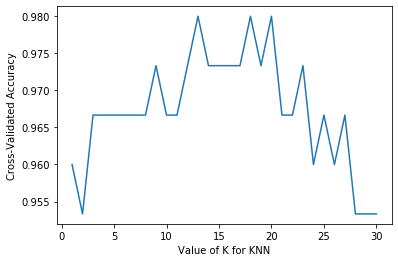

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(nn_range, cf_results.mean_accuracy_for_each_knn)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## KNN versus logistic regression: let crossfold validation decide!

**Goal:** Compare the best KNN model with linear classifier the logistic regression model on the iris dataset

In [18]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=13)
print(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean())

0.975


In [19]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy').mean())

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9666666666666666


# More efficient parameter tuning using `GridSearchCV` (iris)

Instead of managing experiments ourselves via code like this:

        # search for an optimal value of K for KNN
        k_range = list(range(1, 31))
        k_scores = []
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
            k_scores.append(scores.mean())
        print(k_scores)

If we have 3 hyperparamters to tune then we will need potentially **three (3) ** for loops. Or 
we can use `GridSearchCV()` class. For example, the following code simpifies the exploration/tuning of one or more hyperparamters using `GridSearchCV()`

        
        #define the parameter values that should be searched
        k_range = list(range(1, 31))
        #create a parameter grid: map the parameter names to the values that should be searched
        param_grid = dict(n_neighbors=k_range)  
        grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy') # instantiate the grid
        grid.fit(X, y) # fit the grid with data



## GridsearchCV for KNN Hyperparameter  optimization

In [21]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
nn_range = list(range(1, 31))
print(f"nn_range: {nn_range}")
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=nn_range)
print(f"param_grid = {param_grid}\n")


nn_range: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}



In [22]:
# create an instance  GridSearchCV class
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

* You can set **`n_jobs = -1`** to run computations in parallel (if supported by your computer and OS). These days most laptop have 4-6 CPUs plus cores. Make sure Docker's setting have been set to use a 2-4 cores.

### fit the grid with data

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np# read in the iris data
from sklearn.model_selection import GridSearchCV
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=13, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

### Let's put it all together

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np# read in the iris data
from sklearn.model_selection import GridSearchCV
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=4)

# define the parameter values that should be searched
nn_range = list(range(1, 31))
print(f"nn_range: {nn_range}")
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=nn_range)
print(f"param_grid = {param_grid}\n")

# create an instance  GridSearchCV class
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

nn_range: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}



GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=13, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

### View the complete results (list of named tuples)

In [26]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.00046799, 0.00048866, 0.0004467 , 0.000508  , 0.00048125,
        0.00053034, 0.00068588, 0.00055411, 0.00048044, 0.0004508 ,
        0.00046079, 0.00053604, 0.00051532, 0.00048437, 0.0004039 ,
        0.00044518, 0.00039148, 0.00040765, 0.00036595, 0.000335  ,
        0.00033896, 0.00034049, 0.00032756, 0.00033333, 0.00032957,
        0.00034509, 0.00037069, 0.00036242, 0.00034084, 0.00035543]),
 'std_fit_time': array([3.17983624e-05, 6.72718375e-05, 2.44041419e-05, 6.41648184e-05,
        5.13826334e-05, 1.66127089e-04, 1.98681651e-04, 1.50504056e-04,
        9.10103678e-05, 3.30005765e-05, 5.16021807e-05, 1.80159909e-04,
        1.02217705e-04, 7.39694324e-05, 4.45514255e-05, 4.54595900e-05,
        1.42593446e-05, 3.92339922e-05, 3.33887238e-05, 1.67047735e-05,
        3.31117058e-05, 2.37502364e-05, 1.67835334e-05, 2.91492333e-05,
        3.28813797e-05, 2.65644094e-05, 5.91521059e-05, 3.72527714e-05,
        3.33576818e-05, 5.94659909e-05]),
 'mean_scor

### View the complete results as a DataFrame

Each column corresponds to single experiment and each row corresponds to a facet of each experiment such as `mean_test_score`.

In [27]:
results = pd.DataFrame(grid.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
mean_fit_time,0.000467992,0.000488663,0.000446701,0.000507998,0.000481248,0.000530338,0.000685883,0.000554109,0.000480437,0.000450802,...,0.00033896,0.000340486,0.000327563,0.000333333,0.000329566,0.000345087,0.000370693,0.00036242,0.000340843,0.000355434
std_fit_time,3.17984e-05,6.72718e-05,2.44041e-05,6.41648e-05,5.13826e-05,0.000166127,0.000198682,0.000150504,9.10104e-05,3.30006e-05,...,3.31117e-05,2.37502e-05,1.67835e-05,2.91492e-05,3.28814e-05,2.65644e-05,5.91521e-05,3.72528e-05,3.33577e-05,5.9466e-05
mean_score_time,0.00133352,0.00148153,0.00133853,0.00140836,0.00138743,0.00155556,0.00205932,0.00143199,0.0015759,0.00124254,...,0.000974917,0.00101252,0.000992465,0.00100775,0.000970459,0.00107815,0.00103805,0.0011071,0.00101209,0.00108616
std_score_time,9.72522e-05,0.000226638,8.25151e-05,0.000132899,0.000170283,0.000344549,0.000495806,0.00018767,0.000531133,1.93093e-05,...,5.14567e-05,7.77529e-05,3.2794e-05,7.0919e-05,2.91899e-05,0.000152374,5.72713e-05,0.000116424,5.33805e-05,0.000148162
param_n_neighbors,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
params,{'n_neighbors': 1},{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},...,{'n_neighbors': 21},{'n_neighbors': 22},{'n_neighbors': 23},{'n_neighbors': 24},{'n_neighbors': 25},{'n_neighbors': 26},{'n_neighbors': 27},{'n_neighbors': 28},{'n_neighbors': 29},{'n_neighbors': 30}
split0_test_score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
split1_test_score,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.833333,0.916667,0.833333,0.916667,0.916667,0.916667,0.916667,0.916667
split2_test_score,0.916667,0.833333,1,1,1,1,1,1,1,1,...,0.916667,0.916667,0.916667,1,0.916667,0.833333,0.833333,0.833333,0.833333,0.833333
split3_test_score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.916667,1,1,1,1


### examine the `mean_test_score` vector of results

`mean_test_score` corresponds to mean accuracy score on each of the folds for each experimental setup.

In [28]:
### examine the first tuple

print(grid.cv_results_['mean_test_score'])

[0.95833333 0.95833333 0.975      0.98333333 0.98333333 0.98333333
 0.98333333 0.96666667 0.975      0.975      0.98333333 0.975
 0.975      0.95833333 0.96666667 0.95833333 0.95833333 0.95833333
 0.95833333 0.94166667 0.96666667 0.96666667 0.95833333 0.96666667
 0.95       0.94166667 0.95       0.94166667 0.94166667 0.94166667]


Text(0.5, 1.0, 'Accuracy for KNN models with different numbers of nearest neighbors')

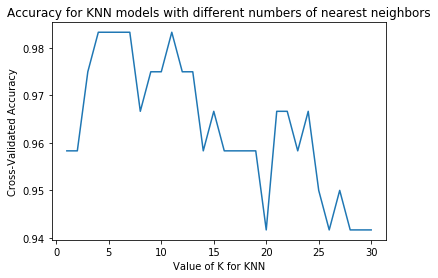

In [30]:
# plot the results
plt.plot(nn_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy for KNN models with different numbers of nearest neighbors')

In [31]:
# examine the best model
print(f"The best model is :\n{grid.best_estimator_}")
print(f"The best hyperparameters are: {grid.best_params_}\n")
print(f"The accuracy of the best found model is :{grid.best_score_}")


The best model is :
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
The best hyperparameters are: {'n_neighbors': 4}

The accuracy of the best found model is :0.9833333333333332


## Searching multiple parameters simultaneously

- **Example:** tuning `max_depth` and `min_samples_leaf` for a `DecisionTreeClassifier`
- Could tune parameters **independently**: change `max_depth` while leaving `min_samples_leaf` at its default value, and vice versa
- But, best performance might be achieved when **neither parameter** is at its default value

In [32]:
# define the parameter values that should be searched
nn_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=nn_range, 
                  weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np# read in the iris data
from sklearn.model_selection import GridSearchCV
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=4)

# define the parameter values that should be searched
nn_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=nn_range, 
                  weights=weight_options)
print(f"param_grid = {param_grid}\n")

# create an instance  GridSearchCV class
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}



GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=13, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:
results = pd.DataFrame(grid.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
mean_fit_time,0.000510526,0.000469995,0.000553632,0.000456405,0.000571227,0.000548959,0.000468302,0.000443649,0.000457549,0.000422955,...,0.000492454,0.000536847,0.000504518,0.000538254,0.000529146,0.000558949,0.000495911,0.00052228,0.000538993,0.000496769
std_fit_time,0.000104256,3.4414e-05,0.000192709,3.54994e-05,0.000285003,0.000150514,5.51612e-05,4.14084e-05,5.74065e-05,2.63215e-05,...,4.93216e-05,0.000141385,5.19757e-05,0.000105834,0.000157773,0.000113418,6.41595e-05,0.000142142,0.000139573,3.94807e-05
mean_score_time,0.00138974,0.000974941,0.00141208,0.000955391,0.00145235,0.00118191,0.00144579,0.000902414,0.00126634,0.000917792,...,0.00151556,0.0010778,0.00147123,0.00102353,0.00148425,0.00111716,0.0014214,0.00109041,0.00149546,0.00106175
std_score_time,0.000129667,9.98399e-05,0.000150812,0.000191185,0.000167304,0.000259908,0.000222316,8.87243e-05,7.75446e-05,0.000219451,...,0.000150987,0.000141647,0.000123878,8.40891e-05,0.000148559,0.000227229,6.04765e-05,0.000167186,0.000126026,0.000106676
param_n_neighbors,1,1,2,2,3,3,4,4,5,5,...,26,26,27,27,28,28,29,29,30,30
param_weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'n_neighbors': 1, 'weights': 'uniform'}","{'n_neighbors': 1, 'weights': 'distance'}","{'n_neighbors': 2, 'weights': 'uniform'}","{'n_neighbors': 2, 'weights': 'distance'}","{'n_neighbors': 3, 'weights': 'uniform'}","{'n_neighbors': 3, 'weights': 'distance'}","{'n_neighbors': 4, 'weights': 'uniform'}","{'n_neighbors': 4, 'weights': 'distance'}","{'n_neighbors': 5, 'weights': 'uniform'}","{'n_neighbors': 5, 'weights': 'distance'}",...,"{'n_neighbors': 26, 'weights': 'uniform'}","{'n_neighbors': 26, 'weights': 'distance'}","{'n_neighbors': 27, 'weights': 'uniform'}","{'n_neighbors': 27, 'weights': 'distance'}","{'n_neighbors': 28, 'weights': 'uniform'}","{'n_neighbors': 28, 'weights': 'distance'}","{'n_neighbors': 29, 'weights': 'uniform'}","{'n_neighbors': 29, 'weights': 'distance'}","{'n_neighbors': 30, 'weights': 'uniform'}","{'n_neighbors': 30, 'weights': 'distance'}"
split0_test_score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
split1_test_score,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
split2_test_score,0.916667,0.916667,0.833333,0.916667,1,1,1,1,1,1,...,0.833333,0.916667,0.833333,1,0.833333,0.833333,0.833333,0.916667,0.833333,0.833333


In [35]:
# view the complete results
grid.cv_results_['mean_test_score']

array([0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.975     ,
       0.975     , 0.98333333, 0.975     , 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.96666667,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.975     ,
       0.98333333, 0.98333333, 0.975     , 0.975     , 0.975     ,
       0.98333333, 0.95833333, 0.975     , 0.96666667, 0.975     ,
       0.95833333, 0.96666667, 0.95833333, 0.96666667, 0.95833333,
       0.96666667, 0.95833333, 0.96666667, 0.94166667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.95833333,
       0.975     , 0.96666667, 0.975     , 0.95      , 0.975     ,
       0.94166667, 0.96666667, 0.95      , 0.96666667, 0.94166667,
       0.95833333, 0.94166667, 0.96666667, 0.94166667, 0.95833333])

In [36]:
# examine the best model
print(f"The best model is :\n{grid.best_estimator_}")
print(f"The best hyperparameters are: {grid.best_params_}\n")
print(f"The accuracy of the best found model is :{grid.best_score_}")


The best model is :
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
The best hyperparameters are: {'n_neighbors': 4, 'weights': 'uniform'}

The accuracy of the best found model is :0.9833333333333332


## Using the best parameters to make predictions: 2 Approaches

### First approach: rebuild a model with the best hyperparameters on all the training data

In [37]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
predicted_class_id = knn.predict([[3, 5, 4, 2]])
# The predicted class is the 1-class
print (f"The predicted class is : {iris.target_names[predicted_class_id[0]]}")
# The predicted class is the 1-class

The predicted class is : versicolor


### Second approach: use model that was returned as part of the GridSearchCV
One of the final steps  in GridSearchCV is to fit a model with the best hyperparameters using all the training data. One can access this model directly. E.g., `grid.predict([[3, 5, 4, 2]])`

In [38]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
predicted_class_id = grid.predict([[3, 5, 4, 2]])
# The predicted class is the 1-class
print (f"The predicted class is : {iris.target_names[predicted_class_id[0]]}")

The predicted class is : versicolor


#  Casestudy: ML workflow from CV to GridSearch: Pima Diabetes

We will apply the techniques discussed above to the Pima Indians Diabetes dataset.  The dataset contains various diagnostic measurements for women of Pima Indiana heritage.  Our goal is to determine whether each woman has diabetes or not based on the available medical information.


| Attribute | Value |
|------------|------|
|Pima Indians dataset | The data can be found in the "datasets" folder inside the Lab02 folder |
|Problem description| Determine whether an individual has diabetes based on available medical data|
|Data engineering | Split the data and generate splits for cross-fold validation|
|Feature engineering | Standardize the numerical data
|Approaches to be explored| Explore KNN for classification, identify best hyperparameters|
|Generate predictions | Evaluate the best model using test data|


## Load the data

In [39]:
import pandas as pd
import numpy as np

pima = pd.read_csv('datasets/Pima-Diabetes/diabetes.csv')

## Understand the data (e.g., review data dictionary, EDA "light")

### Review a data dictionary (when available)

The data available to us includes: 

|Feature|Meaning|
---------|---------
Pregnancies|Number of times pregnant
Glucose|Plasma glucose concentration
BloodPressure|Diastolic blood pressure (mm Hg)
SkinThickness|Triceps skin fold thickness (mm)
Insulin|2-Hour serum insulin (mu U/ml)
BMI|Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction|Calculation based on diabetes history in relatives
Age|Age (years)

The `'outcome'` feature is our target classification variable denoting whether a person has diabetes (Class 1) or not (Class 0).

### Explore counts, datatypes, NaN values, and basic descriptive statistics

In [40]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualize extent of correlation between features

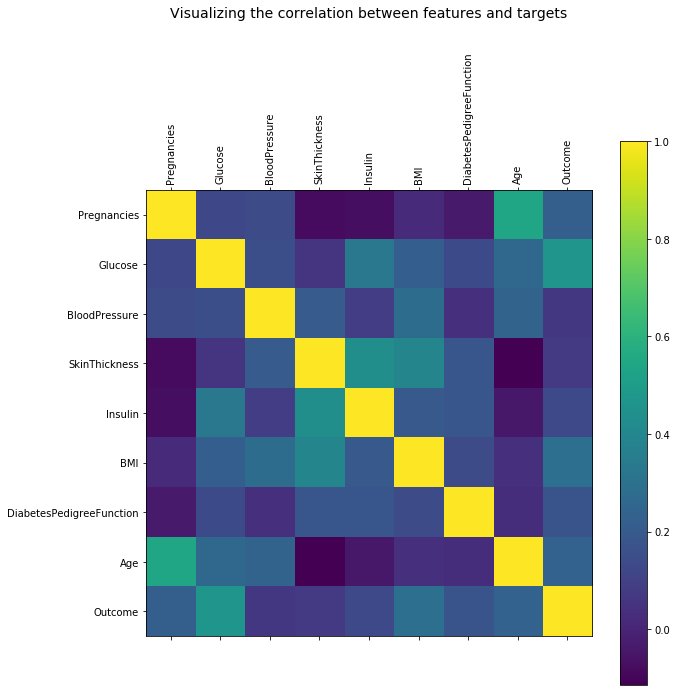

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ms = ax.matshow(pima.corr())
fig.colorbar(ms)
label_count = list(range(len(pima.columns)))
ax.set_xticks(label_count)
ax.set_xticklabels(pima.columns, rotation=90)
ax.set_yticks(label_count)
ax.set_yticklabels(pima.columns)
ax.set_title('Visualizing the correlation between features and targets', pad=150, fontsize=14);

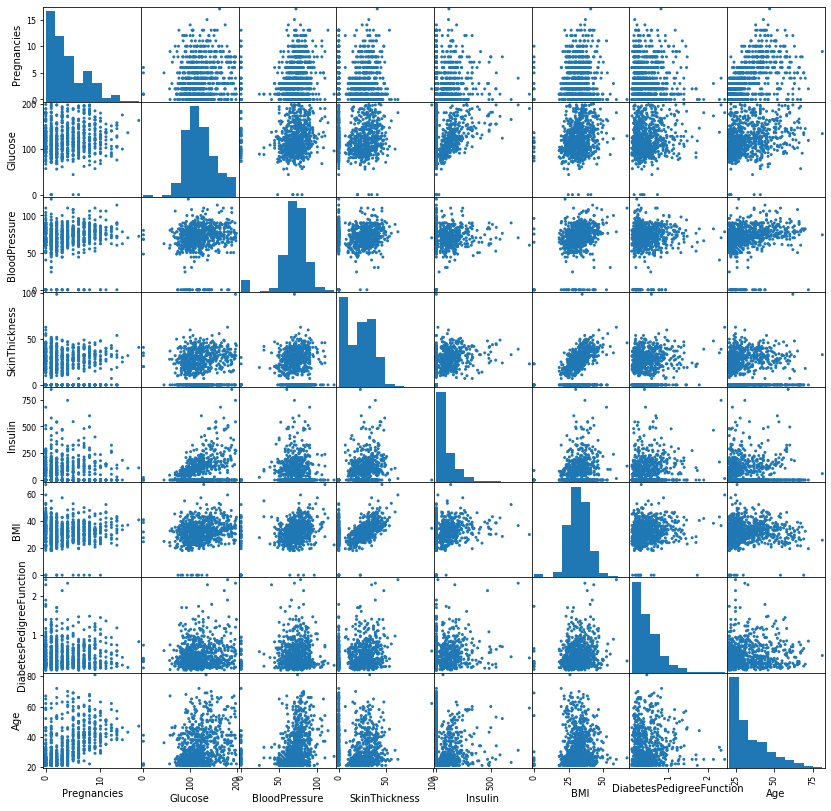

In [44]:
pd.plotting.scatter_matrix(pima.iloc[:,:-1], alpha=1, figsize=(14,14));

## Data engineering (e.g., split data)

### Assign feature values to X and targets to y

In [45]:
X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]

### Separate data into training set and and hold-out test set

In [46]:
from sklearn.model_selection import train_test_split
# note X is a pandas dataframe here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

In [47]:
print('X_train:', len(X_train), '\ty_train:', len(y_train), '\tClass 1 Proportion:',round(np.mean(y_train),3))
print('X_test:', len(X_test), '\ty_test:', len(y_test), '\tClass 1 Proportion:',round(np.mean(y_test),3))

X_train: 614 	y_train: 614 	Class 1 Proportion: 0.349
X_test: 154 	y_test: 154 	Class 1 Proportion: 0.351


### Generate splits for training data

In [48]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

## Feature engineering (e.g., standardize features)
Use StandardScaler to center data around mean of 0 and standard deviation of 1.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# first five samples before scaling
print(X_train.values[0:5])

[[  1.     90.     62.     12.     43.     27.2     0.58   24.   ]
 [  5.    126.     78.     27.     22.     29.6     0.439  40.   ]
 [  2.    105.     58.     40.     94.     34.9     0.225  25.   ]
 [  1.    146.     56.      0.      0.     29.7     0.564  29.   ]
 [  0.     95.     64.     39.    105.     44.6     0.366  22.   ]]


In [51]:
# first five samples after scaling
print(X_train_scaled[0:5])

[[-0.85135507 -0.98013068 -0.40478372 -0.55397256 -0.33131928 -0.60767846
   0.31079384 -0.79216928]
 [ 0.35657564  0.16144422  0.46536842  0.392787   -0.52639809 -0.30213902
  -0.11643851  0.56103382]
 [-0.5493724  -0.50447447 -0.62232176  1.21331196  0.14244354  0.3725939
  -0.76486207 -0.70759409]
 [-0.85135507  0.7956525  -0.73109078 -1.31138021 -0.73076636 -0.28940821
   0.26231357 -0.36929331]
 [-1.15333775 -0.82157861 -0.29601471  1.15019465  0.24462767  1.60748245
  -0.33762972 -0.96131967]]


## Leakage: cross_val_score with StandardScaler as first step

Data leakage refers to a mistake made by the creator of a machine learning model in which they accidentally share information between the held-out test and training data-sets. Typically, when splitting a data-set into testing and training sets, the goal is to ensure that no data is shared between the two. This is because the test set’s purpose is to simulate real-world, using the held-out unseen data. However, when evaluating a model, we do have full access to both our train and test sets, so it is up to us to ensure that no data in the training set is present in the test set.
Data leakage often results in unrealistically-high levels of performance on the test set, because the model is being ran on data that it had already seen — in some capacity — in the training set. The model effectively memorizes the training set data, and is easily able to correctly output the labels/values for those test data-set examples. Clearly, this is not ideal, as it misleads the person evaluating the model. When such a model is then used on truly unseen data, performance will be much lower than expected.

There are lots examples of data leakage. It is important to avoid these situations when training models of your own. In general, you should avoid doing anything to your training set that involves having knowledge of the test set (test set proxies which we use in crossfold validation).

### Leakage via Pre-processing
A very common error that people make is to leak information in the data pre-processing step of machine learning. It is essential that these transformations only have knowledge of the training set, even though these these fitted transformation are applied to the test set as well.

For example, if you decide that you want to run `standardization` as a pre-processing step, you should fit your standardization transformation step on only the training folds (and not all the folds in when doing crossfold validation). Then, to apply it to your test set fold, you would only call its `transform()` method (in the case of a scikit-learn model) on the test fold. If, instead, you fit your pre-processor on the entire training data-set, you will leak information from the test fold, since the parameters of the pre-processing model will be fitted with knowledge of the test fold.


### Leakage via feature selection (covered in a later lecture
The impact of leaking information in the cross-validation varies depending on the
nature of the preprocessing step. Estimating the scale of the data using the test fold
usually doesn’t have a terrible impact, while using the test fold in feature extraction
and feature selection can lead to substantial differences in outcomes.

### Leakage example with Pima-Diabetes and CV

The following cell is an example of LEAKAGE in action as we standardized the entire training dataset and   then do crossfold validation on the preprocessed dataset (leaking scale information betweem training and test folds). As a result the out of sample accuracy estimate that we get via crossfold validation is much higher than the true test accuracy on the heldout test set.


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

pima = pd.read_csv('datasets/Pima-Diabetes/diabetes.csv')
X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]
# note X is a pandas dataframe here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5) 
start = time.time()
# LEAKAGE in action as we standardized the entire training dataset and 
# and then crossfold validation on the preprocessed dataset
knn_cv = cross_val_score(knn, X_train_scaled, y_train, cv=10)
cv_test_accuracy_proxy = knn_cv.mean()
duration = time.time()-start

knn = KNeighborsClassifier() # use default settings
knn.fit(X_train_scaled, y_train)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
out_of_sample_test_acc = metrics.accuracy_score(y_test, y_pred)


results = pd.DataFrame(columns = ['Model', 'cv_test_accuracy_proxy with LEAKAGE', "out_of_sample_test_acc", 'Run Time (ms)'])
results.loc[len(results)] = ['KNN (default)', cv_test_accuracy_proxy, out_of_sample_test_acc, round(duration*1000, 3)]
results

,Model,cv_test_accuracy_proxy with LEAKAGE,out_of_sample_test_acc,Run Time (ms)
0,KNN (default),0.731174,0.701299,60.241


## Overcoming preprocessing leakage using pipelines with  CV 

The next section shows how to overcome preprocessing leakage using pipelines, a machine learning workflow tool implemented in SKLearn. 

# Pipelines:  managing machine learning workflows

In Python scikit-learn, Pipelines can help to define and automate workflows. In this section, we will rework the step-by-step workflow above using Pipelines in sci-kit learn, and you will discover how you can automate a common machine learning workflow.

## Reading Material

For more background on pipelines in Python, please  read the first 6 pages of Chapter 6 (Pages 305-311) of the Muller and Guido book.

## Pipeline Example: Data Preparation and Modeling

An easy trap to fall into in applied machine learning is leaking data from your training dataset to your test dataset especially when doing gridsearch and  crossfold validation.

To avoid this trap you need a robust test harness with strong separation of training and testing. This includes data preparation.

Data preparation is one easy way to leak knowledge of the whole training dataset to the algorithm. For example, preparing your data using normalization or standardization on the entire training dataset before learning would not be a valid test because the training dataset would have been influenced by the scale of the data in the test set.

Pipelines help you prevent data leakage in your test harness by ensuring that data preparation like standardization is constrained to each fold of your cross validation procedure.

The example below demonstrates this important data preparation and model evaluation workflow. The pipeline is defined with two steps:

1. Standardize the data.
* Use grid search to identify a best model using cross-fold validation.

## Building Pipelines
Let’s look at how we can use the Pipeline class to express the workflow for training
an SVM after scaling the data with MinMaxScaler (for now without the grid search).
First, we build a pipeline object by providing it with a list of steps. Each step is a tuple
containing a name (any string of your choosing1) and an instance of an estimator:

```python 
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())])
```
Here, we created two steps: the first, called "scaler", is an instance of MinMaxScaler,
and the second, called "knn", is an instance of KNN. Now, we can fit the pipeline, like
any other scikit-learn estimator:

```python 
pipe.fit(X_train, y_train)
```
Here, `pipe.fit()` first calls fit on the first step (the scaler), then transforms the training
data using the scaler, and finally fits the KNN with the scaled data. To evaluate on
the test data, we simply call pipe.score:

```python 
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.95
```

Calling the score method on the pipeline first transforms the test data using the
scaler, and then calls the score method on the KNN using the scaled test data. As you
can see, the result is identical to the one we got from the code at the beginning of the
chapter, when doing the transformations by hand. Using the pipeline, we reduced the
code needed for our “preprocessing + classification” process. The main benefit of
using the pipeline, however, is that we can now use this single estimator in
`cross_val_score` or `GridSearchCV`.

## Overcoming preprocessing leakage using pipelines with  CV 

The next section shows how to overcome preprocessing leakage using pipelines, a machine learning workflow tool implemented in SKLearn. 

### Explore hyperparameter outcomes manually

In [53]:
# Provide X, and Y and run this cell 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline

pima = pd.read_csv('datasets/Pima-Diabetes/diabetes.csv')
X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]
# note X is a pandas dataframe here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)


# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []
# create pipeline

# we will loop through reasonable values of k
for k in k_range:
    #### create pipeline 
    # First, we build a pipeline object by providing it with a list of steps. 
    # Each step is a tuple containing a name (any string of your choosing1) and 
    # an instance of an estimator
    estimators = [] 
    estimators.append(('standardize', StandardScaler()))# standardize the data
    estimators.append(('knn', KNeighborsClassifier(n_neighbors=k)))
    pipe = Pipeline(estimators)
    # evaluate pipeline
    seed = 7
    #kfold = KFold(n_splits=10, random_state=seed)
    scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)

[0.7263352723426757, 0.7150713907985192, 0.7314119513484929, 0.7296932839767318, 0.7328133262823903, 0.7313061872025384, 0.7475409836065574, 0.7507667900581703, 0.762083553675304, 0.7540719196192489, 0.7524590163934426, 0.7590428344791116, 0.7557905869910101, 0.7590957165520889, 0.7623215230037017, 0.7589899524061343, 0.7525383395029085, 0.7574034902168164, 0.7475674246430459, 0.7622421998942358, 0.749206768905341, 0.7557377049180328, 0.7573770491803279, 0.7541248016922264, 0.7540983606557377, 0.7524061343204653, 0.757297726070862, 0.7638551031200423, 0.7574563722897938, 0.7556848228450554]


Text(0.5, 1.0, 'Pima Diabetes classification\nCrossValidation accuracy on KNN number of neighbors')

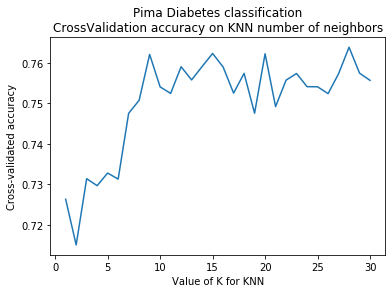

In [54]:
# plot how accuracy changes as we vary nn
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.title("Pima Diabetes classification\nCrossValidation accuracy on KNN number of neighbors")

## Using Pipelines in Grid Searches
Using a pipeline in a grid search works the same way as using any other estimator. We
define a parameter grid to search over, and construct a GridSearchCV from the pipeline
and the parameter grid. When specifying the parameter grid, there is a slight
change, though. We need to specify for each parameter which step of the pipeline it
belongs to. Both parameters that we want to adjust, `n_neighbors` and `weights`, are parameters of
KNN, the second step. We gave this step the name "knn". The syntax to define a parameter
grid for a pipeline is to specify for each parameter the step name, followed by __
(a double underscore), followed by the parameter name. To search over the `n_neighbors` parameter
of KNN we therefore have to use `"knn__n_neighbors"` as the key in the parameter grid dictionary,
and similarly for `weights`:

```python
param_grid = {'knn__n_neighbors': list(range(1,21)),
          'knn__weights': ['uniform', 'distance'],
          'knn__p': list(range(1,11))}
```
With this parameter grid we can use GridSearchCV as usual:

```python
pipe = Pipeline([('standardize', StandardScaler()),
                  ('knn', KNeighborsClassifier())
                 ])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
Out[9]:
Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'knn__n_neighbors': 1, 'weights': 'uniform'}
```

In contrast to the grid search we did before, now for each split in the cross-validation,
the `MinMaxScaler` is refit with only the training splits and no information is leaked
from the test split into the parameter search.

In [55]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pima = pd.read_csv('datasets/Pima-Diabetes/diabetes.csv')
X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {'knn__n_neighbors': list(range(1,21)),
          'knn__weights': ['uniform', 'distance'],
          'knn__p': list(range(1,11))}
#### create pipeline 
# First, we build a pipeline object by providing it with a list of steps. 
# Each step is a tuple containing a name (any string of your choosing1) and 
# an instance of an estimator
model = Pipeline([('standardize', StandardScaler()),
                  ('knn', KNeighborsClassifier())
                 ])
grid = GridSearchCV(model, params, cv=5, refit=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   47.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardize',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
      

### Evaluate the best model on the heldout test dataset

Fitting the `GridSearchCV` object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance. The
GridSearchCV class provides a very convenient interface to access the retrained
model using the `predict()` and `score()` methods. To evaluate how well the best found
parameters generalize, we can call the `score()` method from the `GridSearchCV` class instance on the test set:

```python
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
```

The `predict()` method takes test cases and calculates the predictions for each test case (i.e., without evaluating any metrics).

```python
y_preds = grid.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_preds)
```

In [56]:
##similarly using the best most and the score method
print(f"Test set score: {grid.score(X_test, y_test):.3f}")

Test set score: 0.682


In [57]:

y_preds = grid.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_preds)

print("Best model:", grid.best_estimator_)
print("Test accuracy:", score)

Best model: Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=11, p=4,
                                      weights='distance'))],
         verbose=False)
Test accuracy: 0.6818181818181818


### Having a closer look GridSearchCV's experimental results

In [58]:
results = pd.DataFrame(grid.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
mean_fit_time,0.00446944,0.00460148,0.00435343,0.00385613,0.00423384,0.00379605,0.00314727,0.00301256,0.00305882,0.0033587,...,0.00369363,0.00324383,0.00315318,0.00348401,0.00343904,0.00349374,0.00330601,0.0030921,0.00332551,0.00336647
std_fit_time,0.000239707,0.000628152,0.000223486,0.000703698,0.00045499,0.000565799,0.000137388,5.83703e-05,6.05825e-05,0.000169372,...,0.000261416,0.000127686,0.00013573,0.000478759,0.000215023,0.000253108,0.000196268,2.21477e-05,0.000258558,0.000423772
mean_score_time,0.00796828,0.00311222,0.00782175,0.0022675,0.0215386,0.0150892,0.015863,0.0119794,0.0149684,0.0130011,...,0.0267105,0.0229439,0.0257642,0.0226272,0.0256176,0.0237959,0.0267004,0.0212952,0.0264707,0.0220897
std_score_time,0.000407608,0.000251192,0.000828666,0.000107423,0.00146232,0.00134766,0.000377987,0.000444145,0.000247545,0.00134642,...,0.000665711,0.00118948,0.0005451,0.00119492,0.000427233,0.00147333,0.00116133,0.000302113,0.000708126,0.00131433
param_knn__n_neighbors,1,1,1,1,1,1,1,1,1,1,...,20,20,20,20,20,20,20,20,20,20
param_knn__p,1,1,2,2,3,3,4,4,5,5,...,6,6,7,7,8,8,9,9,10,10
param_knn__weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'distance'}","{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'distance'}","{'knn__n_neighbors': 1, 'knn__p': 3, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 1, 'knn__p': 3, 'knn__weights': 'distance'}","{'knn__n_neighbors': 1, 'knn__p': 4, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 1, 'knn__p': 4, 'knn__weights': 'distance'}","{'knn__n_neighbors': 1, 'knn__p': 5, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 1, 'knn__p': 5, 'knn__weights': 'distance'}",...,"{'knn__n_neighbors': 20, 'knn__p': 6, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 20, 'knn__p': 6, 'knn__weights': 'distance'}","{'knn__n_neighbors': 20, 'knn__p': 7, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 20, 'knn__p': 7, 'knn__weights': 'distance'}","{'knn__n_neighbors': 20, 'knn__p': 8, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 20, 'knn__p': 8, 'knn__weights': 'distance'}","{'knn__n_neighbors': 20, 'knn__p': 9, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 20, 'knn__p': 9, 'knn__weights': 'distance'}","{'knn__n_neighbors': 20, 'knn__p': 10, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 20, 'knn__p': 10, 'knn__weights': 'distance'}"
split0_test_score,0.666667,0.666667,0.674797,0.674797,0.674797,0.674797,0.658537,0.658537,0.658537,0.658537,...,0.699187,0.699187,0.699187,0.691057,0.699187,0.691057,0.707317,0.699187,0.707317,0.691057
split1_test_score,0.731707,0.731707,0.764228,0.764228,0.764228,0.764228,0.756098,0.756098,0.764228,0.764228,...,0.788618,0.796748,0.796748,0.796748,0.796748,0.788618,0.788618,0.788618,0.788618,0.788618


In [59]:
print(grid.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'param_knn__p', 'param_knn__weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [60]:
res_df = pd.DataFrame({"mean_test_score": grid.cv_results_["mean_test_score"], 
              "hyper_params":grid.cv_results_["params"]})
display(res_df)

,mean_test_score,hyper_params
0,0.701973,"{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}"
1,0.701973,"{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'distance'}"
2,0.721498,"{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}"
3,0.721498,"{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'distance'}"
4,0.716607,"{'knn__n_neighbors': 1, 'knn__p': 3, 'knn__weights': 'uniform'}"
...,...,...
395,0.736186,"{'knn__n_neighbors': 20, 'knn__p': 8, 'knn__weights': 'distance'}"
396,0.742703,"{'knn__n_neighbors': 20, 'knn__p': 9, 'knn__weights': 'uniform'}"
397,0.737812,"{'knn__n_neighbors': 20, 'knn__p': 9, 'knn__weights': 'distance'}"
398,0.741077,"{'knn__n_neighbors': 20, 'knn__p': 10, 'knn__weights': 'uniform'}"


In [61]:
print("All GRID results\n-----------------------------------------------")
cvres = grid.cv_results_
#cvres is a results data structure. PRINT it!  print(cvres)

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("GRID", mean_score, params)
print("\nAll GRID results\n-----------------------------------------------")
#print("grid_search.cv_results_", grid_search.cv_results_)
#estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
#            Either estimator needs to provide a score function, or scoring must be passed.
#Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
print("Best score: %0.3f" % grid.best_score_)
print("Best parameters set:")
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(grid.best_params_.keys()):
    print("\t%s: %r" %(param_name, best_parameters[param_name]))

All GRID results
-----------------------------------------------
GRID 0.7019725443156071 {'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}
GRID 0.7019725443156071 {'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'distance'}
GRID 0.7214980674396907 {'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}
GRID 0.7214980674396907 {'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'distance'}
GRID 0.7166066906570705 {'knn__n_neighbors': 1, 'knn__p': 3, 'knn__weights': 'uniform'}
GRID 0.7166066906570705 {'knn__n_neighbors': 1, 'knn__p': 3, 'knn__weights': 'distance'}
GRID 0.7149673463947754 {'knn__n_neighbors': 1, 'knn__p': 4, 'knn__weights': 'uniform'}
GRID 0.7149673463947754 {'knn__n_neighbors': 1, 'knn__p': 4, 'knn__weights': 'distance'}
GRID 0.7100759696121551 {'knn__n_neighbors': 1, 'knn__p': 5, 'knn__weights': 'uniform'}
GRID 0.7100759696121551 {'knn__n_neighbors': 1, 'knn__p': 5, 'knn__weights': 'distance'}
GRID 0.7117019858723177 {'knn__n_neighbors': 1, 'k

GRID 0.7378115420498468 {'knn__n_neighbors': 14, 'knn__p': 2, 'knn__weights': 'uniform'}
GRID 0.7394375583100093 {'knn__n_neighbors': 14, 'knn__p': 2, 'knn__weights': 'distance'}
GRID 0.7589764094362256 {'knn__n_neighbors': 14, 'knn__p': 3, 'knn__weights': 'uniform'}
GRID 0.7557243769159003 {'knn__n_neighbors': 14, 'knn__p': 3, 'knn__weights': 'distance'}
GRID 0.7410769025723044 {'knn__n_neighbors': 14, 'knn__p': 4, 'knn__weights': 'uniform'}
GRID 0.7410502465680394 {'knn__n_neighbors': 14, 'knn__p': 4, 'knn__weights': 'distance'}
GRID 0.7410502465680395 {'knn__n_neighbors': 14, 'knn__p': 5, 'knn__weights': 'uniform'}
GRID 0.742702918832467 {'knn__n_neighbors': 14, 'knn__p': 5, 'knn__weights': 'distance'}
GRID 0.7361721977875517 {'knn__n_neighbors': 14, 'knn__p': 6, 'knn__weights': 'uniform'}
GRID 0.7426895908303345 {'knn__n_neighbors': 14, 'knn__p': 6, 'knn__weights': 'distance'}
GRID 0.7394242303078769 {'knn__n_neighbors': 14, 'knn__p': 7, 'knn__weights': 'uniform'}
GRID 0.7410502465

# Task: Use a pipeline for Hyperparameter tuning for KNN via crossfold validation

Using the previous section(s) as guidance, apply a pipeline workflow **on the Wine Quality dataset** which is available via `from sklearn.datasets import load_wine`.

In the case of this problem explore the following and determine the optimal modeling pipeling:

* Determine the optimal value of the number of nearest neighbors for a KNN classifier for the wine quality dateset using N-fold cross validation when n=10.
* should the data be standardized or not?

Please  adopt the following code as a basis for this task.

In [62]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [63]:
X = wine.data
y = wine.target

In [64]:
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

dataset_name = "Wine Producer identifier"
ds = load_wine()
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target,
                                                    random_state=0)

param_grid = {
               'knn__n_neighbors': list(range(1,16)),
               'knn__weights':['uniform', 'distance'],
              }

pipe = Pipeline([
    ('standardize', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',
                   verbose =1)
grid.fit(X_train, y_train)
n, wgt = grid.best_params_['knn__n_neighbors'], grid.best_params_['knn__weights']

# experiment table of results
# del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=[ "CV_Acc_proxy", "Test_Acc", "Dataset", 
                                               "Exp_Desc", "Model", "Hyperparams"])
experimentLog.loc[len(experimentLog)] =[f"{grid.best_score_:10.3f}", 
                                        f"{grid.score(X_test, y_test):10.3f}", 
                                        dataset_name, "predict wine producer", "KNN",
                                        f"knn__weights={wgt}, k_nn={n}"]
display(experimentLog)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished


,CV_Acc_proxy,Test_Acc,Dataset,Exp_Desc,Model,Hyperparams
0,0.963,0.933,Wine Producer identifier,predict wine producer,KNN,"knn__weights=uniform, k_nn=1"


## More about Grid Search

We hypertune the following parameters:

* Best K
* weight/uniform

This code performs  a two-dimensional grid search to determine the optimal combination of hyperparameters for the Pima-Indian Diabetes binary classifiction problem. It means that we will do thirty (30) experiments (15 by 2 combinations), where are doing 5-fold cross validation (`cv=5`). Overall, that means we are build 150 models, and we test each of these on the held out fold. 

In [65]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [66]:
# Grid Search for Algorithm Tuning

parameters = [{'knn__n_neighbors': list(range(1,16)),
               'knn__weights':['uniform', 'distance'],
              }]

pipe = Pipeline([
    ('standardize', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

grid_search = GridSearchCV(pipe, parameters, cv=5, refit=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.962962962962963
Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)


In [67]:
from sklearn.preprocessing import Normalizer
print("All GRID results\n-----------------------------------------------")
cvres = grid_search.cv_results_
#cvres is a results data structure. PRINT it!  print(cvres)
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("GRID", mean_score, params)
print("\nAll GRID results\n-----------------------------------------------")
#print("grid_search.cv_results_", grid_search.cv_results_)
#estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
#            Either estimator needs to provide a score function, or scoring must be passed.
#Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(grid_search.best_params_.keys()):
    print("\t%s: %r" %(param_name, best_parameters[param_name]))

All GRID results
-----------------------------------------------
GRID 0.962962962962963 {'knn__n_neighbors': 1, 'knn__weights': 'uniform'}
GRID 0.962962962962963 {'knn__n_neighbors': 1, 'knn__weights': 'distance'}
GRID 0.9404558404558404 {'knn__n_neighbors': 2, 'knn__weights': 'uniform'}
GRID 0.962962962962963 {'knn__n_neighbors': 2, 'knn__weights': 'distance'}
GRID 0.9401709401709402 {'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
GRID 0.9401709401709402 {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
GRID 0.9327635327635327 {'knn__n_neighbors': 4, 'knn__weights': 'uniform'}
GRID 0.9555555555555555 {'knn__n_neighbors': 4, 'knn__weights': 'distance'}
GRID 0.9549857549857549 {'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
GRID 0.9549857549857549 {'knn__n_neighbors': 5, 'knn__weights': 'distance'}
GRID 0.9623931623931623 {'knn__n_neighbors': 6, 'knn__weights': 'uniform'}
GRID 0.9626780626780626 {'knn__n_neighbors': 6, 'knn__weights': 'distance'}
GRID 0.9626780626780626 {'knn__n

## Grid search object contains a lot of information.
Go ahead and explore.

In [68]:
print(grid_search.best_params_)

{'knn__n_neighbors': 1, 'knn__weights': 'uniform'}


In [69]:
print(grid_search.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'param_knn__weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [70]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.00129271, 0.00127754, 0.00138993, 0.00110703, 0.00115967,
       0.00116949, 0.00116038, 0.00113864, 0.00123415, 0.00105143,
       0.00101833, 0.000985  , 0.00090709, 0.00085754, 0.00083504,
       0.00083141, 0.00082564, 0.00082831, 0.00081921, 0.00080743,
       0.00083032, 0.00082407, 0.00081902, 0.00078683, 0.00076537,
       0.00086832, 0.00081029, 0.00083485, 0.0008801 , 0.00099502]), 'std_fit_time': array([3.80311489e-04, 2.52598048e-04, 2.10338886e-04, 7.47122422e-05,
       7.66581544e-05, 6.69586005e-05, 2.28260110e-05, 8.75211710e-05,
       1.66106318e-04, 6.08812941e-05, 4.92386954e-05, 1.14370225e-04,
       3.45694114e-05, 8.62439327e-05, 1.03101478e-04, 5.31401586e-05,
       4.42254575e-05, 3.67305159e-05, 3.34918282e-05, 4.81290525e-05,
       3.63190934e-05, 3.81900425e-05, 3.97246852e-05, 2.78227025e-05,
       2.32618350e-05, 6.98168417e-05, 2.39620042e-05, 2.61681525e-05,
       5.30809076e-05, 1.41590497e-04]), 'mean_score_time': array

# Elispse problem

elipse 
regression
poly 
poly features

polynomial regression

# Practice  Task: Diabetes Progression Regression 

This section provides all the data and starter code to explore the following:

1. feature engineering
* KNN Hyperparameter optimization
* pipeline-based derived features and feature selection

Please run all cells in this section and  respond to the questions included here. Feel free to modify the code once you have completed the tasks, amd experiment with new settings.

Here is summary of the main steps that you will complete in this section:

1. Load the data
* EDA
* Split the data into training and a heldout (aka blind) test set
* Define hyperparameter grid
* Configure the pipeline (standardize the data; build model)
* Set up gridsearch with crossfold validation
* Examine results of grid search
* Use the best model to compute metrics on the heldout test set


## NOTE: Utility maximization via Gridsearch (maximize utility == minimize MSE)

### Minimize MSE is equivalent to maximizing (-MSE)
Grid search will use cross_val_score based on maximizing a utility performance measure. So we maximize utility means `maximizing(-MSE)` for a regression problem where our goal is to minimize the MSE (mean squared error).

A similar argument applies to GridSearchCV (which uses cross_val_score at its core).

```python
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
```

## Introducing the problem dataset
Predict diabetes progression one year after baseline using patient information and tests such as:
*     Age
*     Sex
*     Body mass index
*     Average blood pressure
*     S1
*     S2
*     S3
*     S4
*     S5
*     S6


## Load the dataset

In [71]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

In [72]:
## 

In [73]:
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

## Exploratory data analysis
Perform EDA through visualizing the data and also do other statistical analysis.

Note that we shift the X data to make it all positive.  It doesn't affect the results, but some of the subsequent algorithms only work with positive data

In [74]:
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) 
y = diabetes.target
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [75]:
X.describe() # Let's also take a look into correlation matrix of features

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


Let's also take a look into correlation matrix of features

In [76]:
# compute the correlation matrix
X_y = pd.DataFrame(np.c_[diabetes.data, diabetes.target], columns = diabetes.feature_names + ["diabetesProg"])
# NOTE: np.c_[diabetes.data, diabetes.target] append vector to matrix 
corr = X_y.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetesProg
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


### Compute the correlation matrix between all inputs and the output


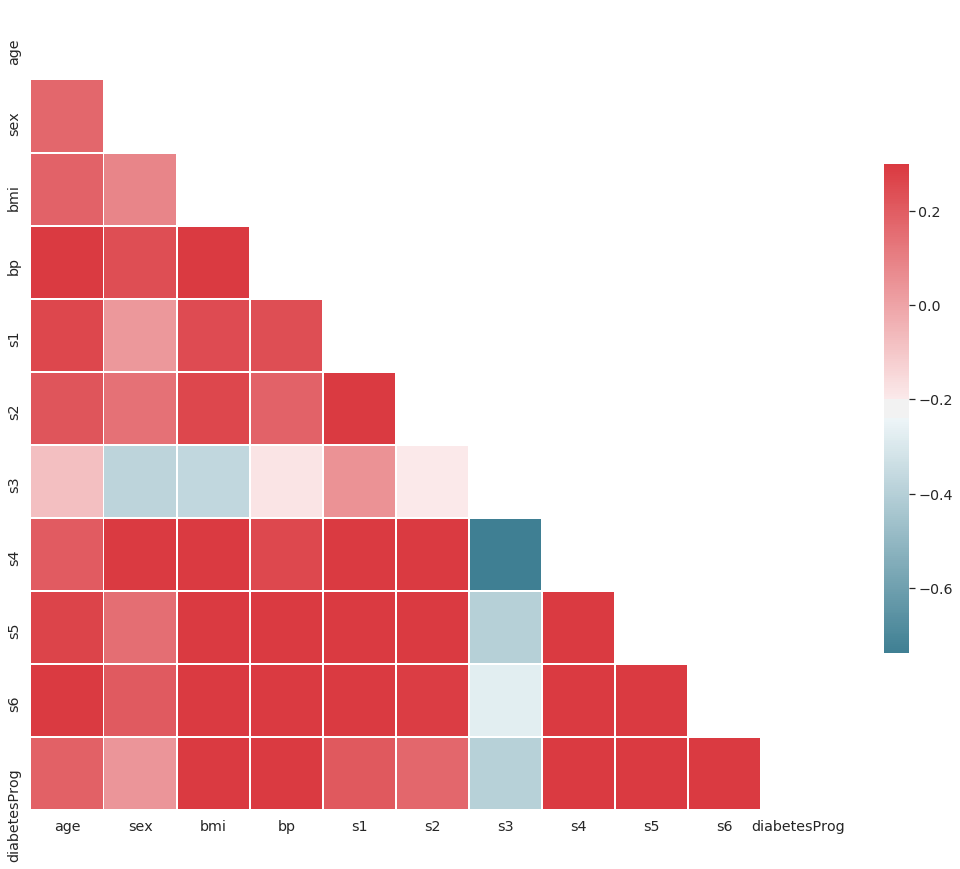

In [77]:
# compute the correlation matrix
X_y = pd.DataFrame(np.c_[diabetes.data, diabetes.target], columns = diabetes.feature_names + ["diabetesProg"])
# NOTE: np.c_[diabetes.data, diabetes.target] append vector to matrix 
corr = X_y.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 11, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

### Visualize the data pairwise using the seaborn's `pairplot()`

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetesProg
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


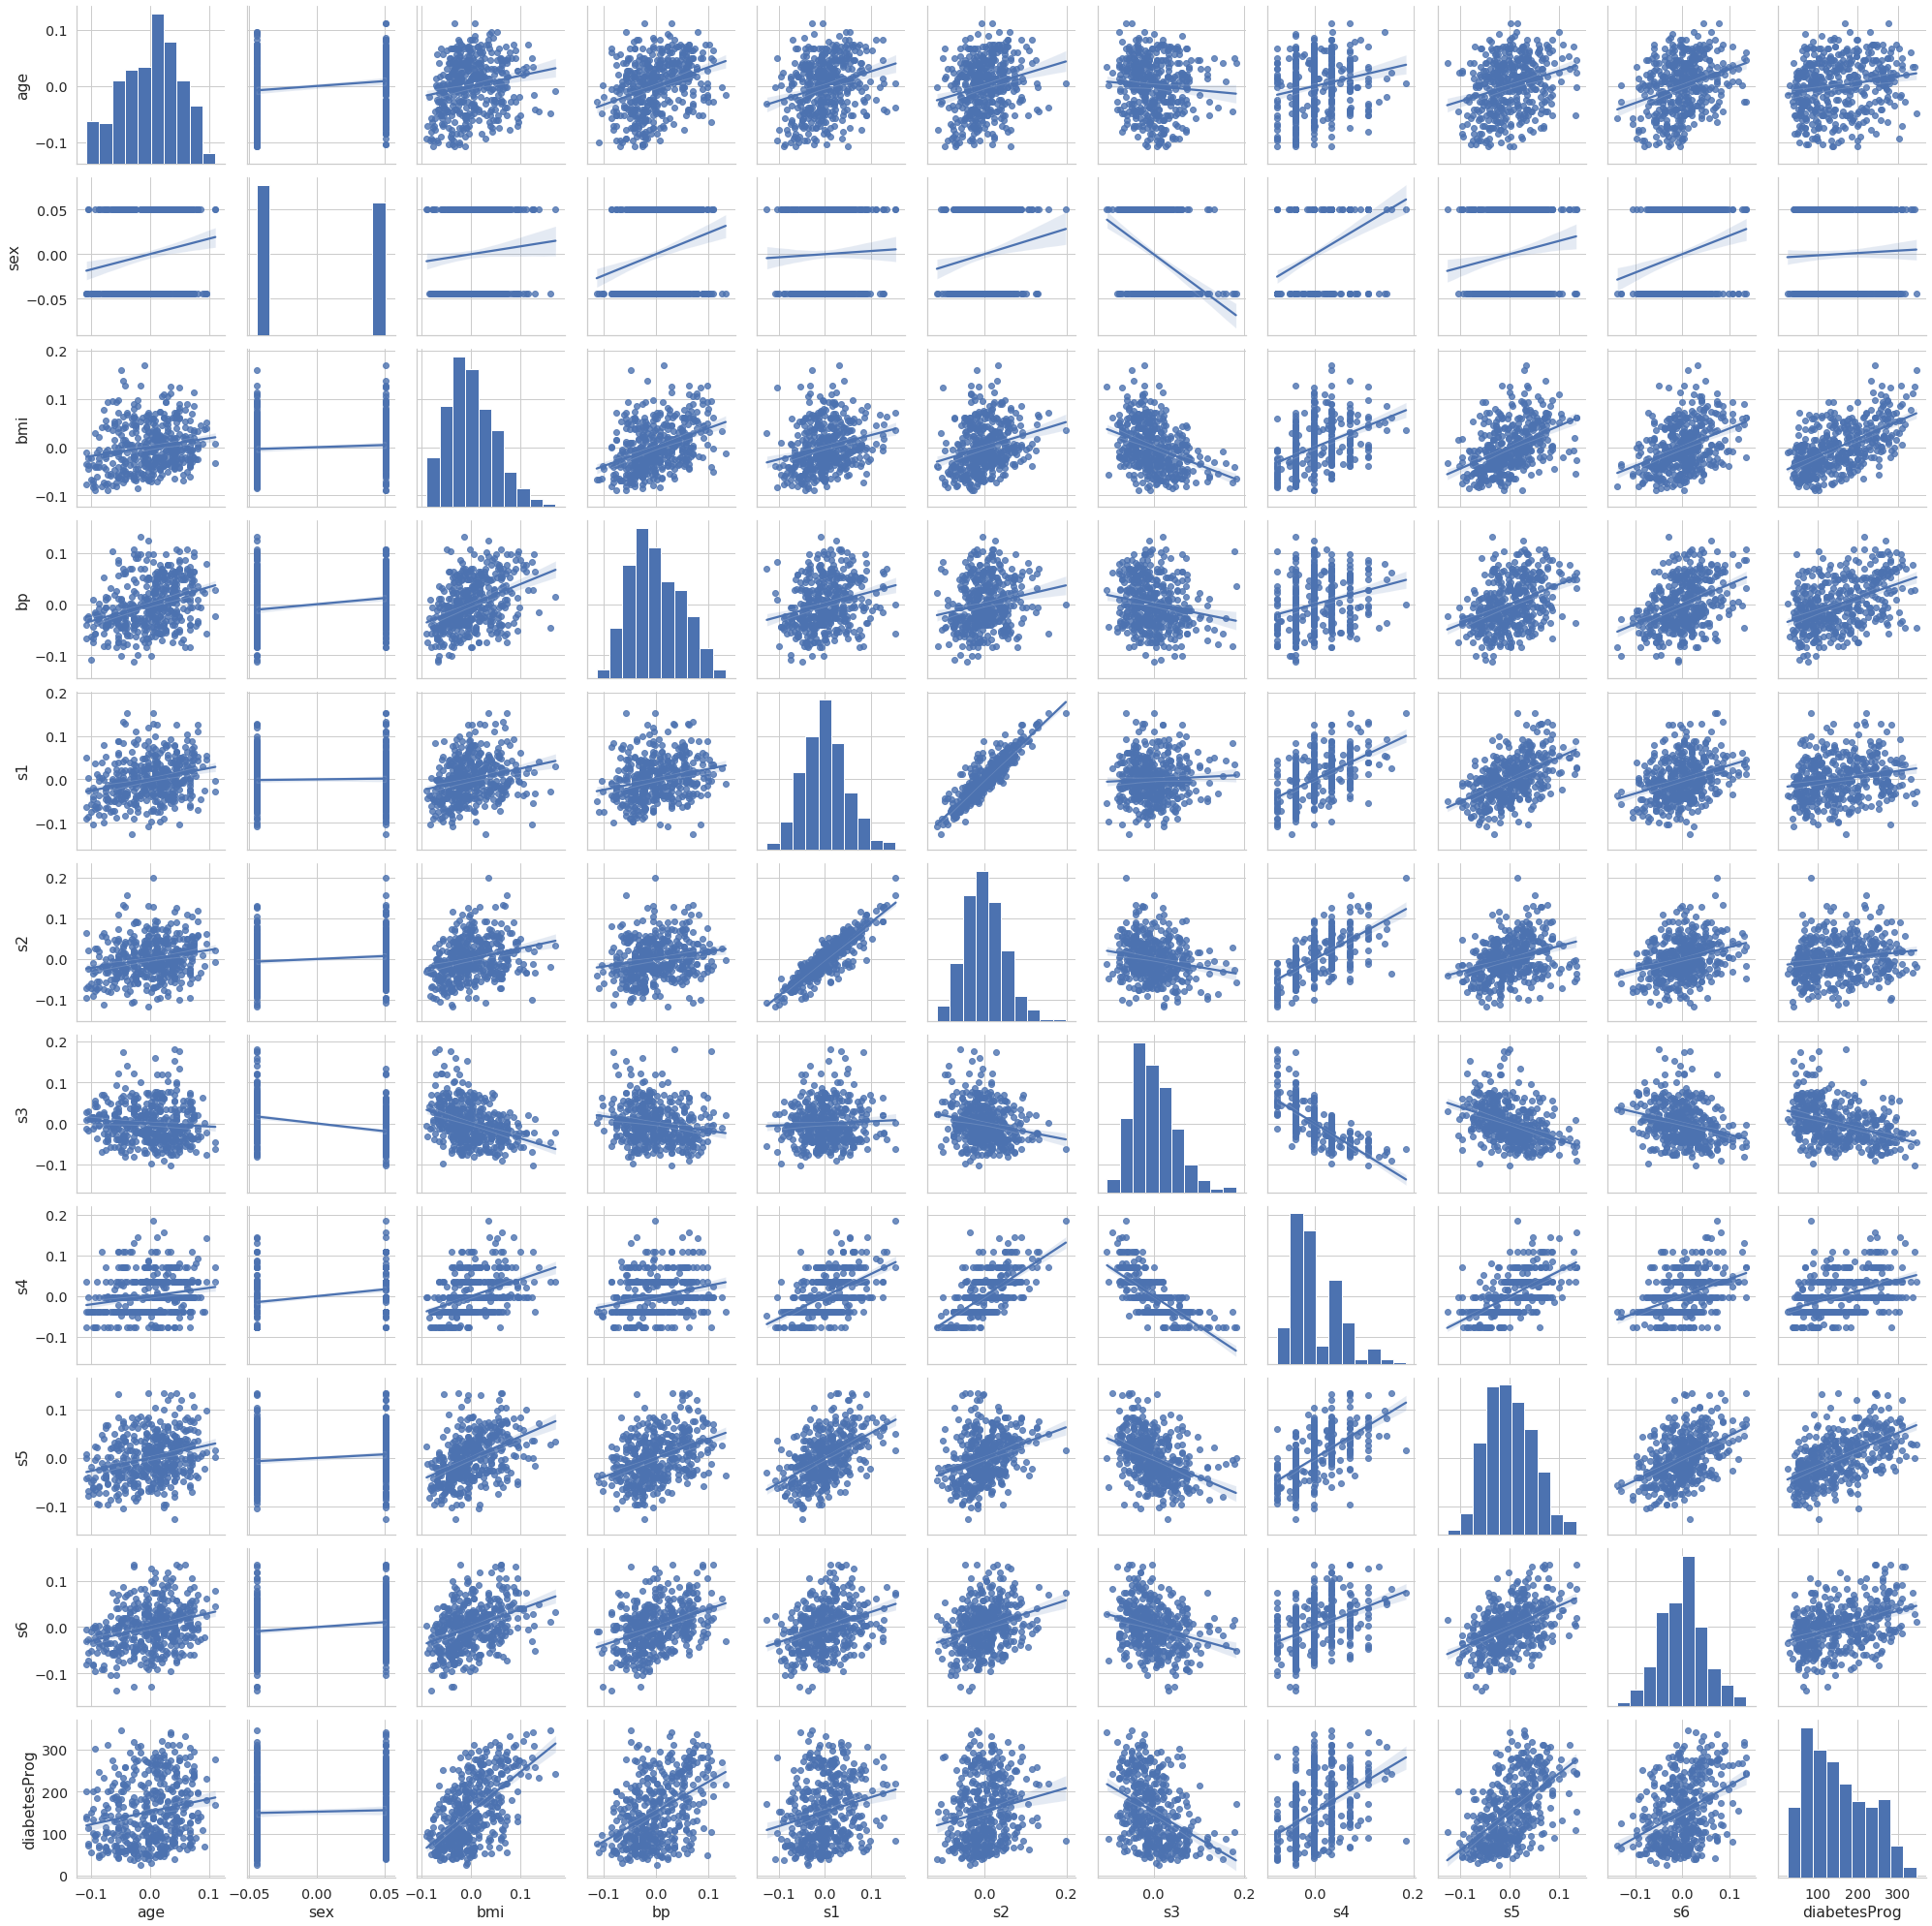

In [78]:
from sklearn import datasets
import numpy as np

diabetes = datasets.load_diabetes()
# iris = datasets.load_iris()
#X = iris.data[:, [2, 3]]
#y = iris.target
type(y)
diabetes_i_o_matrix = np.c_[diabetes.data, diabetes.target]  #append vector to matrix 
df = pd.DataFrame(diabetes_i_o_matrix, columns=diabetes.feature_names + ["diabetesProg"])
  
sns.pairplot(df, kind="reg")
df.head()

## Split data into Train and Test

Split data into 70% training and 30% test data. GridSearch uses crossfold validation. Therefore we do not need a validation set.

In [79]:
type(X)  #data stored in a numpy.ndarray

pandas.core.frame.DataFrame

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

ds = datasets.load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(
    ds.data, ds.target, test_size=0.3, random_state=1)

In [81]:
print(f'X_train.shape: {X_train.shape}  y_train: {len(y_test)}')
print(f'X_test.shape: {X_test.shape}  y_test: {len(y_test)}')


X_train.shape: (309, 10)  y_train: 133
X_test.shape: (133, 10)  y_test: 133


## Feature engineering

At this point we could do some feature engineering. For example, we could create a new `area` feature based upon taking the product of the length and width features if a problem had such features (e.g., see the iris flower classification problem). We would view this feature as a derived feature based upon the interaction of two base input features. 

Next we look at how to generate interaction features and polynomial features using SKLearn's `PolynomialFeatures()`.



### Polynomial and Interation Features

Here we  explore datasets with polynomial features and interaction features.

First of all, we can generate such a dataset using sklearn, this code will demonstrate how to use it. (You can also use [this link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) to check the user guide)

```python
from sklearn.preprocessing import PolynomialFeatures
x = np.arange(4).reshape(2, 2)
poly = PolynomialFeatures(2)
print (x)
poly.fit_transform(x)

### outputs the following:
[[0 1]
 [2 3]]
array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])
```


Here using the original dataset of the form $(x_1,x_2)$ = [[0,1], [2,3]], in combination with `PolynomialFeatures(2)` yields a new dataset $(1,x_1,x_2,x_1^2,x_1x_2,x_2^2)$ = (1,0,1,0,0,1), (1,2,3,4,6,9)

## Train a KNN regression model using derived features

### The General Pipeline Interface
The Pipeline class is not restricted to preprocessing and classification, but can in
fact join any number of estimators together. For example, you could build a pipeline
containing feature extraction, feature selection, scaling, and classification, for a total
of four steps (at least!). Similarly, the last step could be regression or clustering instead of classification.

The only requirement for estimators in a pipeline is that all but the last step need to
have a transform method, so they can produce a new representation of the data that
can be used in the next step.
Internally, during the call to `Pipeline.fit()`, the pipeline calls fit and then transform
on each step in turn(or just `fit_transform()`), with the input given by the output of the transform method of the previous step. For the last step in the pipeline, just `fit()` is called.


#### Heatmap plotting helper function

In [82]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f", title =""):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)
    ax.set_title(title)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img, ax


### Grid-searching:  preprocessing, polyFeatures,  and modeling

In [83]:
from sklearn.datasets import load_diabetes
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


ds = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target,
                                                    random_state=0)

param_grid = {'polynomialfeatures__degree': [1, 2, 3], 
               'knn__n_neighbors': list(range(1,16))
               #'knn__weights':['uniform', 'distance'],
              }

from sklearn.preprocessing import PolynomialFeatures
pipe = Pipeline([
    ('standardize', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures()),
    ('knn', KNeighborsRegressor())
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error',
                   verbose =1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardize',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('knn',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
            

In [84]:
# view the complete results
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002161,0.000480,0.001814,0.000366,1,1,"{'knn__n_neighbors': 1, 'polynomialfeatures__degree': 1}",-53.492537,-60.439394,-67.833333,-51.136364,-57.575758,-58.095477,5.834487,43
1,0.003398,0.001062,0.004165,0.000375,1,2,"{'knn__n_neighbors': 1, 'polynomialfeatures__degree': 2}",-55.388060,-63.151515,-69.121212,-57.212121,-65.409091,-62.056400,5.104609,44
2,0.006488,0.000404,0.013388,0.001090,1,3,"{'knn__n_neighbors': 1, 'polynomialfeatures__degree': 3}",-60.119403,-66.681818,-66.287879,-58.484848,-59.560606,-62.226911,3.518280,45
3,0.002132,0.000417,0.002082,0.000487,2,1,"{'knn__n_neighbors': 2, 'polynomialfeatures__degree': 1}",-49.955224,-49.500000,-53.386364,-55.143939,-45.606061,-50.718318,3.313801,38
4,0.003112,0.000554,0.004613,0.001015,2,2,"{'knn__n_neighbors': 2, 'polynomialfeatures__degree': 2}",-48.425373,-56.295455,-56.787879,-55.977273,-48.803030,-53.257802,3.802148,41
5,0.005078,0.000260,0.013419,0.002176,2,3,"{'knn__n_neighbors': 2, 'polynomialfeatures__degree': 3}",-51.798507,-58.492424,-59.696970,-51.295455,-50.113636,-54.279398,3.987781,42
6,0.001635,0.000344,0.001672,0.000223,3,1,"{'knn__n_neighbors': 3, 'polynomialfeatures__degree': 1}",-44.383085,-50.020202,-46.444444,-49.848485,-44.555556,-47.050354,2.463940,13
7,0.002763,0.000349,0.004992,0.000328,3,2,"{'knn__n_neighbors': 3, 'polynomialfeatures__degree': 2}",-43.144279,-50.282828,-54.101010,-51.696970,-46.792929,-49.203603,3.844293,24
8,0.008075,0.002145,0.015212,0.001037,3,3,"{'knn__n_neighbors': 3, 'polynomialfeatures__degree': 3}",-47.422886,-53.212121,-56.040404,-50.787879,-46.010101,-50.694678,3.676218,36
9,0.003915,0.003162,0.005046,0.003347,4,1,"{'knn__n_neighbors': 4, 'polynomialfeatures__degree': 1}",-43.097015,-49.367424,-46.886364,-46.015152,-43.825758,-45.838342,2.242740,9


In [85]:
# multiply by -1 to convert utility to loss
# I.e., recover mean_absolute_error from 'neg_mean_absolute_error'
grid.cv_results_['mean_test_score'].reshape(-1,3)*[-1.0] 

array([[58.09547716, 62.05639982, 62.2269109 ],
       [50.7183175 , 53.2578019 , 54.27939846],
       [47.05035429, 49.2036032 , 50.69467812],
       [45.83834238, 47.89627996, 49.36118272],
       [46.27194934, 48.39663501, 49.73919493],
       [46.04975878, 48.17336801, 48.93053671],
       [45.05199974, 48.82086322, 49.1257285 ],
       [45.51953302, 48.79456128, 48.94754071],
       [44.88418011, 49.0628323 , 49.8023167 ],
       [45.1578607 , 49.60486205, 49.16723202],
       [44.71133177, 49.98993462, 49.68005016],
       [44.98296397, 50.22135911, 49.62291949],
       [45.71884285, 50.70003827, 49.80507602],
       [45.78586612, 50.8198165 , 49.89350326],
       [46.09701794, 51.00689582, 50.12279813]])

/usr/local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


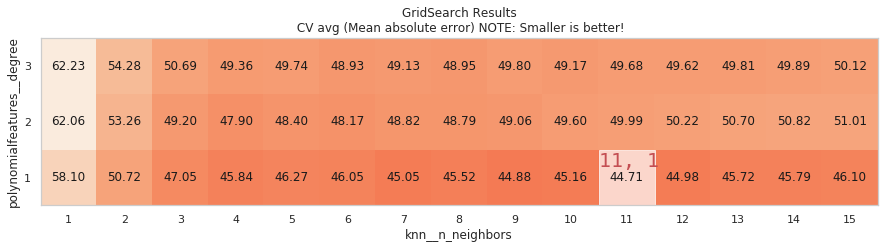

In [86]:

sns.set(style="whitegrid", font_scale=1.0)
#matplotlib.rcParams["legend.framealpha"] = 1
#matplotlib.rcParams["legend.frameon"] = True

plt.rc('figure', figsize=(15, 15))
img, ax = heatmap(-grid.cv_results_['mean_test_score'].reshape(-1,3).T,
                      xlabel="knn__n_neighbors", ylabel="polynomialfeatures__degree",
                      xticklabels=param_grid['knn__n_neighbors'],
                      yticklabels=param_grid['polynomialfeatures__degree'], vmin=0,
       title="GridSearch Results\n CV avg (Mean absolute error) NOTE: Smaller is better!")
x, y = best_model_coords = grid.best_params_['knn__n_neighbors'], grid.best_params_['polynomialfeatures__degree']
ax.text(x-1, y-0.3, f'{x}, {y}', color = "R", family='monospace', fontsize=20)
rect = plt.Rectangle((x-1, y-1), 1, 1, color='white', alpha=0.7)
ax.add_patch(rect)

In [87]:
print("Best parameters: {}".format(grid.best_params_))


Best parameters: {'knn__n_neighbors': 11, 'polynomialfeatures__degree': 1}


In [88]:
# score returns neg_mean_absolute_error so must muiltiply by -1.0 to 
# get the loss metric: mean_absolute_error
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test) *-1.0)) 

Test-set score: 46.24


In [89]:
from sklearn.datasets import load_diabetes
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

dataset_name = "Diabetes Regression"
ds = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target,
                                                    random_state=0)

param_grid = {'polynomialfeatures__degree': [1, 2, 3], 
               'knn__n_neighbors': list(range(1,16))
               #'knn__weights':['uniform', 'distance'],
              }

from sklearn.preprocessing import PolynomialFeatures
pipe = Pipeline([
    ('standardize', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures()),
    ('knn', KNeighborsRegressor())
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error',
                   verbose =1)
grid.fit(X_train, y_train)
n, deg = grid.best_params_['knn__n_neighbors'], grid.best_params_['polynomialfeatures__degree']

# experiment table of results
# del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=[ "CVTrain_MAE", "Test_MAE", "Dataset", 
                                               "Exp_Desc", "Model", "Hyperparams"])
experimentLog.loc[len(experimentLog)] =[f"{-grid.best_score_:10.3f}", 
                                        f"{-grid.score(X_test, y_test):10.3f}", 
                                        dataset_name, "std, poly features", "KNN",
                                        f"poly_deg={deg}, k_nn={n}"]
display(experimentLog)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    0.5s finished


,CV_Acc_proxy,Test_Acc,Dataset,Exp_Desc,Model,Hyperparams
0,0.963,0.933,Wine Producer identifier,predict wine producer,KNN,"knn__weights=uniform, k_nn=1"
1,44.711,46.235,Diabetes Regression,"std, poly features",KNN,"poly_deg=1, k_nn=11"


In [90]:
del experimentLog


### Simple pipeline with original features only
Just crosschecking the pipeline with original features only

In [91]:
param_grid = {'kneighborsregressor__n_neighbors': list(range(1,16))}
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print("Test-score withOUT poly features: {:.2f}".format(-grid.score(X_test, y_test)))
nn = grid.best_params_['kneighborsregressor__n_neighbors']

# experiment table of results
# del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=[ "CVTrain_MAE", "Test_MAE", "Dataset", 
                                               "Model", "Exp_Desc", "Hyperparams"])
experimentLog.loc[len(experimentLog)] =[f"{-grid.best_score_:10.3f}", 
                                        f"{-grid.score(X_test, y_test):10.3f}", 
                                        dataset_name, "orig std features", "KNN",
                                        f"k_nn={nn}"]
display(experimentLog)


Test-score withOUT poly features: 46.24


,CVTrain_MAE,Test_MAE,Dataset,Model,Exp_Desc,Hyperparams
0,44.711,46.235,Diabetes Regression,orig std features,KNN,k_nn=11


### Question: polynomial features
Do the polynomial features help with to the test error? 

ANSWER ???

### Question: mean_absolute_error
What is the mean absolute error on the test dataset for this pipeline? Report to two decimal places.

ANSWER??

# Gridsearch for KNN regression for the Boston housing data

Using the previous section, Section 7, as a template explore if polynomial features combined with KNN can effectively model the  Boston housing price prediction problem.

##  KNN regression model for the Boston housing data

Using SKLearn's implemention of KNN, determine a good KNN regression model for the Boston housing dataset (that is part of the `sklearn.datasets` (from sklearn.datasets import load_boston)).  Use RMSE (root mean squared error) as the performance metric for hyperparameter tuning. Dont forget to use the negative of RMSE during gridsearch!

The code to import this data is provided below. 

Also, you can use the grid search code provided in the previous questions. There is no need to modify any code, but try to reconfigure the pipeline and gridsearch as follows:


* Add an additional hyperparameter (p) to the gridsearch. Try values 1 (Manhattan) or 2 (Euclidean) distance. 

Finally, please report test RMSE of the best configuration as determined by gridsearch in terms of a number within 2 decimal places. e.g, an RMSE of 0.8134 as produced by gridsearch should be reported as 0.81. Please use np.round(rmse, 2).

In [92]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [93]:
# Uncomment and run the line below to learn more about the Boston dataset
# print(boston.DESCR)